# BMI Data Analysis

## Introduction
The BMI dataset includes measurement of height and weight for 500 people. On the basis of these measurement the 'Body Mass Index(BMI)' has been calculated. The BMI depicts whether the person is 0 - Extremely Weak, 1 - Weak, 2 - Normal, 3 - Overweight, 4 - Obese or 5 - Extreme Obese.

**Research Work**<br>
Classify the person's BMI on the basis of there height and weight

**Hypothesis**<br>
**$H_{0}$-** There is no statistical relationship between person's height and weight.<br>
**$H_{1}$-** There is statistical relationship between person's height and weight.<br>


**Logistic Regression Assumptions**<br>
+ Dependent variables should be categorical, binary or ordinal
+ Linearity- observations should be independent
+ Little or no multicollinearity among the independent variables
+ Influential Values such as extreme outliers

In [2]:
#ignoring the warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import statistics as s
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
#importing the dataset
data = pd.read_csv("C:/Users/apoorv.srivastava/Downloads/datasets 2/datasets/BMI/bmi-data.csv")

In [5]:
#Printing out the column/variable names
print(data.columns.values)

['Gender' 'Height' 'Weight' 'Index']


In [6]:
#printing out 5 rows of data
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [23]:
#copying the data to another data variable for visualizing and making some changes
visual_data = data.copy()

In [24]:
visual_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
#proving hypothesis
ttest,pVal = ss.ttest_ind(data.Height, data.Weight)
print("pValue = ",pVal)
if pVal < 0.05:
    print("Rejecting Null Hypothesis and Accepting Alternative Hyposthesis")
else:
    print("Accepting Null Hypothesis and Rejecting Alternative Hypothesis")

pValue =  1.4541168650389354e-205
Rejecting Null Hypothesis and Accepting Alternative Hyposthesis


In [10]:
#checking out the shape of dataset
data.shape

(500, 4)

In [11]:
#checking if any null values are there or not
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

**Conclusion-1**<br>
There is no null values

In [26]:
#adding additional column as it is needed to visualize the data perfrectly
def index_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
visual_data['Status'] = visual_data.apply(index_to_description,axis=1)
visual_data.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


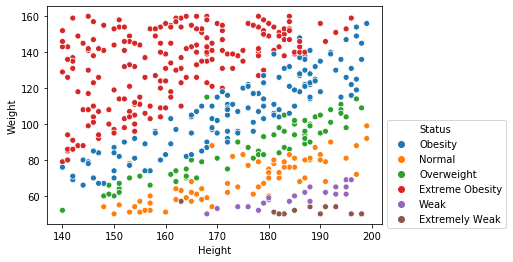

In [46]:
#checking the linearity assumption by plotting scatterplot
sns.scatterplot(x = 'Height', y = 'Weight', data = visual_data, hue = 'Status');
plt.legend(bbox_to_anchor=(1.0, 0.5));

**Conclusion-2**<br>
As the scatterplot depict there are very less linearity so we can ignore it.

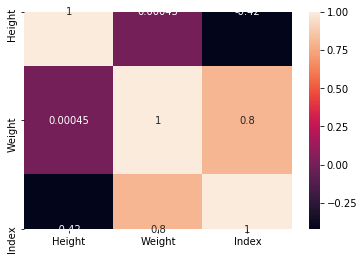

In [49]:
#checking multicollinearity among the independent variables by plotting heatmap
#plt.figure(figsize=(10,10))
sns.heatmap(visual_data.corr(), annot= True);

In [50]:
visual_data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


**Conclusion-3**<br>
As the heatmap and correlation data depict that there is no multicolinearity.

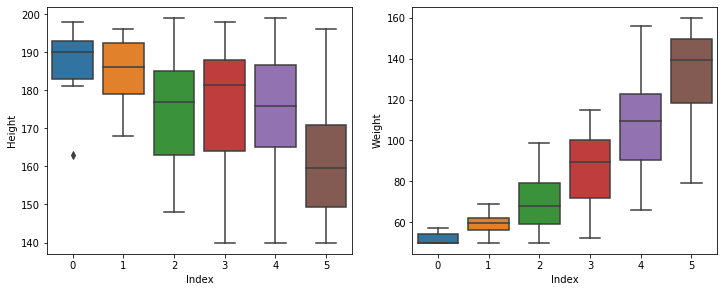

In [59]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Index',y='Height',data=visual_data);
plt.subplot(2,2,2)
sns.boxplot(x='Index',y='Weight',data=visual_data);

**Conclusion-4**<br>
There is no influential values. Only one is there so we can ignore it.

In [61]:
#converting gender to labels
def gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
visual_data['gender_lbl'] = visual_data.apply(gender_to_label,axis=1)
visual_data.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


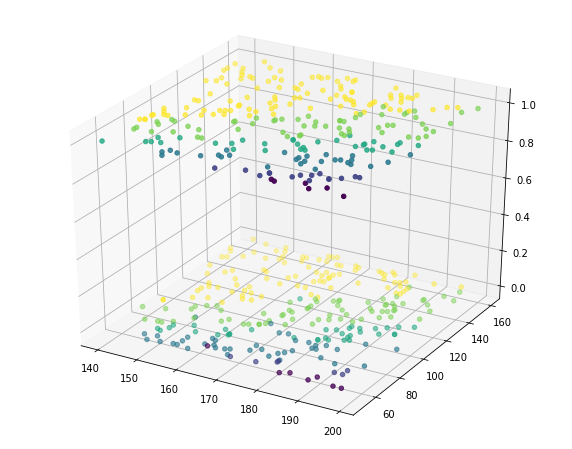

In [70]:
#plotting 3d scatterplot to differentiate between male and female
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(visual_data['Height'],visual_data['Weight'] , visual_data['gender_lbl'], c=visual_data['Index']);

In [71]:
#Counting genders
visual_data['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [73]:
#Counting number of people w.r.t. their health status
visual_data['Status'].value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

In [90]:
train,test=train_test_split(visual_data,test_size=0.3)

In [92]:
#evaluating the performance of our model. Therefore setting a quarter of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(visual_data, visual_data['Index'], test_size = 0.3)

In [93]:
import sklearn.metrics as metrics
lr=LogisticRegression()
lr.fit(X_train,y_train)
lrprediction=lr.predict(X_test)
accuracy=metrics.accuracy_score(lrprediction,y_test)
print("Accuracy {} ".format(accuracy*100))

Accuracy 78.66666666666666 


In [94]:
#printing the wrong pretected
test_predData=test.copy()
test_predData['PredictedIndex']=lrprediction
wrongpred=test_predData.loc[test['Index'] != lrprediction]
wrongpred

,Height,Weight,Index,gender_lbl,PredictedIndex
317,142,135,5,1,4
418,162,130,5,1,2
92,194,111,3,0,5
8,174,90,3,1,5
269,168,50,1,1,5
...,...,...,...,...,...
55,187,89,3,0,4
124,158,149,5,0,4
455,176,77,2,1,5
87,145,117,5,1,4
